In [1]:
import os
import numpy as np
import gdown
from pathlib import Path

import tensorflow as tf
from tensorflow import keras

In [2]:
url_path_map = {
        'train': {
            'url':'https://drive.google.com/uc?id=1JewlmOsqs-O1EmMMKutcYYiD7GkN6brN', 
            'path':'dataset/train.npy'
            },
        'test': {
            'url':'https://drive.google.com/uc?id=1JcCFZbc_N7VIa3G3XA8grwz4XGdaaXSZ', 
            'path':'dataset/test.npy'
            },
        'label': {
            'url':'https://drive.google.com/uc?id=1JiaTOcZ6QfDThw3RrIa3ZxDDaNt-BMUQ',
            'path':'dataset/label_info.txt'
        }
    }

In [3]:
def download_dataset():
    Path('dataset').mkdir(exist_ok=True)
    for split in ['train', 'test', 'label']:
        if Path(url_path_map[split]['path']).exists():
            continue
        gdown.download(url_path_map[split]['url'], url_path_map[split]['path'], quiet=False)

In [4]:
download_dataset()

Downloading...
From: https://drive.google.com/uc?id=1JewlmOsqs-O1EmMMKutcYYiD7GkN6brN
To: /content/dataset/train.npy
753MB [00:05, 140MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JcCFZbc_N7VIa3G3XA8grwz4XGdaaXSZ
To: /content/dataset/test.npy
753MB [00:03, 236MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JiaTOcZ6QfDThw3RrIa3ZxDDaNt-BMUQ
To: /content/dataset/label_info.txt
100%|██████████| 534/534 [00:00<00:00, 224kB/s]


In [5]:
def read_txt(file_name):
    with open(file_name, 'rt') as f:
        class_list = [row.strip('\n') for row in f.readlines()]
    return class_list

In [6]:
train_dir = '/content/dataset/train.npy'
test_dir = '/content/dataset/test.npy'
label_dir = '/content/dataset/label_info.txt'

In [7]:
train = np.load(train_dir, allow_pickle=True).item()
test = np.load(test_dir, allow_pickle=True).item()

In [8]:
train_image , train_label = train['image'], train['label']
test_image, test_label = test['image'], test['label']

In [9]:
train_image.shape, train_label.shape

((500, 224, 224, 30), (500,))

In [10]:
test_image.shape, test_label.shape

((500, 224, 224, 30), (500,))

In [11]:
train_image = np.split(train_image, 10, axis=3)
#test_image = np.split(test_image, 10, axis=3)

In [12]:
train_image = np.array(train_image)
test_image = np.array(test_image)

In [13]:
train_image.shape, test_image.shape

((10, 500, 224, 224, 3), (500, 224, 224, 30))

In [14]:
train_image = train_image.reshape((-1, 224, 224, 3))
#test_image = test_image.reshape((-1, 224, 224, 3))

In [15]:
train_image.shape, test_image.shape

((5000, 224, 224, 3), (500, 224, 224, 30))

In [16]:
label_temp = np.append(train_label, train_label) #2
label_temp = np.append(label_temp, label_temp) #4
label_temp = np.append(label_temp, label_temp) #8
label_temp = np.append(label_temp, train_label) #9
train_label_extended = np.append(label_temp, train_label) #10

In [17]:
#test_label_extended = np.zeros(shape=(5000,))

In [ ]:
#train_label_extended.shape

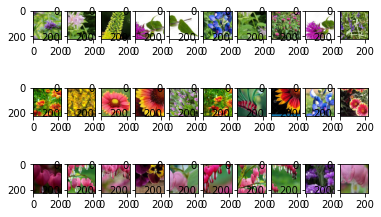

In [ ]:
import matplotlib.pyplot as plt
for i in range(30):
  plt.subplot(3, 10, i+1)
  plt.imshow(train_image[i])

TypeError: ignored

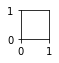

In [17]:
import matplotlib.pyplot as plt
for i in range(30):
  plt.subplot(3, 10, i+1)
  plt.imshow(test_image[i])

In [18]:
train_image = train_image.astype('float32') / 255.0
test_image = test_image.astype('float32') / 255.0

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_image, train_label_extended))
test_dataset = tf.data.Dataset.from_tensor_slices((test_image, test_label))

In [20]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 5000

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
import matplotlib.pyplot as plt
'''
#plt.figure(figsize=(3, 10))
for i in range(30):
  plt.subplot(3, 10, i+1)
  plt.imshow(train_image[i])
  '''

'\n#plt.figure(figsize=(3, 10))\nfor i in range(30):\n  plt.subplot(3, 10, i+1)\n  plt.imshow(train_image[i])\n  '

In [ ]:
#plt.imshow(train_image[54])

In [ ]:
label_list = read_txt(label_dir)

In [ ]:
label_list

['Bergamot',
 'BlanketFlower',
 'BleedingHeart',
 'Bletilla',
 'Bluebonnets',
 'BluestarFlower',
 'Brassica',
 'Broom',
 'Calceolaria',
 'Celosia',
 'Chionodoxa',
 'CoralBells',
 'CuckooFlower',
 'Dietes',
 'DutchIris',
 'EnglishBluebell',
 'Eremurus',
 'FrangipaniFlower',
 'Fuchsia',
 'Guzmania',
 'Hebe',
 'Helenium',
 'Hellebore',
 'Honeysuckle',
 'Ixia',
 'Jacob’sLadder',
 'KangarooPaw',
 'Knautia',
 'Lewesia',
 'Lotus',
 'Meconopsis',
 'Mimosa',
 'MorningGlory',
 'NewZealandTeaTree',
 'OrientalLily',
 'Oxalis',
 'OysterPlant',
 'Pansy',
 'Photinia',
 'PincushionFlower',
 'Poinsettia',
 'Queen’sCup',
 'RockRose',
 'Scaevola',
 'ScentedGeranium',
 'Statice',
 'Tuberose',
 'UrnPlant',
 'VirginiaCreeper',
 'Winterberry']

In [21]:
from tensorflow.keras import models, layers

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [23]:
model = models.Sequential()

In [24]:
# 1st Conv2d
#  - filter_cnt : 32 - kerner_size : (3,3) - relu
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                        input_shape=(224, 224, 3),
                        name='block_1_conv'))
# 1st max pooling
# - pool_size = (2,2)
model.add(layers.MaxPool2D(pool_size=2,name='block_1_pool'))
# 2nd Conv2d
#  - filter_cnt : 64 - kerner_size : (3,3) - relu
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu',
                        name='block_2_conv'))
# 2nd max pooling
# - pool_size = (2,2)
model.add(layers.MaxPool2D(pool_size=2, name='block_2_pool'))
# 3rd Conv2d
#  - filter_cnt : 64 - kerner_size : (3,3) - relu
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu',
                        name='block_3_conv'))
# Flatten
model.add(layers.Flatten())

#classification module
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=50, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block_1_conv (Conv2D)        (None, 222, 222, 32)      896       
_________________________________________________________________
block_1_pool (MaxPooling2D)  (None, 111, 111, 32)      0         
_________________________________________________________________
block_2_conv (Conv2D)        (None, 109, 109, 64)      18496     
_________________________________________________________________
block_2_pool (MaxPooling2D)  (None, 54, 54, 64)        0         
_________________________________________________________________
block_3_conv (Conv2D)        (None, 52, 52, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 173056)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [26]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
model.fit(train_dataset, epochs=30)

Epoch 1/30
79/79 [==============================] - 22s 59ms/step - loss: 4.0159 - accuracy: 0.0314
Epoch 2/30
79/79 [==============================] - 5s 58ms/step - loss: 3.8059 - accuracy: 0.0422
Epoch 3/30
79/79 [==============================] - 5s 57ms/step - loss: 3.6938 - accuracy: 0.0692
Epoch 4/30
79/79 [==============================] - 5s 58ms/step - loss: 3.5183 - accuracy: 0.1120
Epoch 5/30
79/79 [==============================] - 5s 57ms/step - loss: 3.2448 - accuracy: 0.1768
Epoch 6/30
79/79 [==============================] - 5s 58ms/step - loss: 2.6943 - accuracy: 0.3164
Epoch 7/30
79/79 [==============================] - 5s 58ms/step - loss: 2.0670 - accuracy: 0.4928
Epoch 8/30
79/79 [==============================] - 5s 58ms/step - loss: 1.5876 - accuracy: 0.6260
Epoch 9/30
79/79 [==============================] - 5s 58ms/step - loss: 1.3194 - accuracy: 0.6938
Epoch 10/30
79/79 [==============================] - 5s 58ms/step - loss: 1.1016 - accuracy: 0.7428
Epoch 11

In [28]:
loss, accuracy = model.evaluate(train_dataset)

79/79 [==============================] - 5s 31ms/step - loss: 0.2907 - accuracy: 0.8888


In [30]:
test_image = test_image.reshape((-1,224,224,3))

In [31]:
predictions = model.predict(test_image)

In [ ]:
np.argmax(predictions[2])

41

In [32]:
import pandas as pd

In [33]:
id=[]
pred=[]
for i in range(500):
  id.append(i)
  pred.append(np.argmax(predictions[i]))

In [34]:
challenge = pd.DataFrame({'image_id':id, 'label':pred})

In [35]:
challenge

,image_id,label
0,0,31
1,1,31
2,2,31
3,3,31
4,4,31
...,...,...
495,495,49
496,496,49
497,497,49
498,498,49


In [36]:
challenge.to_csv('deepChallenge06.csv', index=False)